In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df  = pd.read_excel('/content/drive/MyDrive/Capstone/orang dan penyakit.xlsx')
df

,No,Jenis Kelamin,Usia,Berat (kg),Tinggi (cm),Jenis Aktivitas,Kolesterol,Asam Lambung,Diabetes Tipe 1,Diabetes Tipe 2,Darah Tinggi,Darah Rendah,Usus Buntu
0,1,Laki-laki,30,70,170,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak
1,2,Perempuan,45,65,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,Laki-laki,55,80,175,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,4,Perempuan,40,55,165,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya
4,5,Laki-laki,50,90,180,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak
5,6,Perempuan,35,60,155,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
6,7,Laki-laki,42,75,172,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
7,8,Perempuan,28,52,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
8,9,Laki-laki,60,85,178,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
9,10,Perempuan,47,63,158,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya


In [4]:
df.isna().sum()

 No                  0
 Jenis Kelamin       0
 Usia                0
 Berat (kg)          0
 Tinggi (cm)         0
 Jenis Aktivitas     0
 Kolesterol          0
 Asam Lambung        0
 Diabetes Tipe 1     0
 Diabetes Tipe 2     0
 Darah Tinggi        0
 Darah Rendah        0
 Usus Buntu          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(50, 13)

In [7]:
df.dtypes

 No                   int64
 Jenis Kelamin       object
 Usia                 int64
 Berat (kg)           int64
 Tinggi (cm)          int64
 Jenis Aktivitas     object
 Kolesterol          object
 Asam Lambung        object
 Diabetes Tipe 1     object
 Diabetes Tipe 2     object
 Darah Tinggi        object
 Darah Rendah        object
 Usus Buntu          object
dtype: object

In [8]:
df.columns

Index([' No ', ' Jenis Kelamin ', ' Usia ', ' Berat (kg) ', ' Tinggi (cm) ',
       ' Jenis Aktivitas ', ' Kolesterol ', ' Asam Lambung ',
       ' Diabetes Tipe 1 ', ' Diabetes Tipe 2 ', ' Darah Tinggi ',
       ' Darah Rendah ', ' Usus Buntu '],
      dtype='object')

In [9]:
df.rename(columns={
    " No ":"no",
    " Jenis Kelamin ":"jenis_kelamin",
    " Usia ":"usia",
    " Berat (kg) ":"berat(kg)",
    " Tinggi (cm) ":"tinggi(cm)",
    " Jenis Aktivitas ":"jenis_aktivitas",
    " Kolesterol ":"kolesterol",
    " Asam Lambung ":"asam_lambung",
    " Diabetes Tipe 1 ":"diabetes_tipe_1",
    " Diabetes Tipe 2 ":"diabetes_tipe_2",
    " Darah Tinggi ":"darah_tinggi",
    " Darah Rendah ":"darah_rendah",
    " Usus Buntu ":"usus_buntu"
    },inplace=True)

In [10]:
train_df = df.copy()

In [11]:
scaler = MinMaxScaler()
train_df[['usia', 'berat(kg)', 'tinggi(cm)']] = scaler.fit_transform(train_df[['usia', 'berat(kg)', 'tinggi(cm)']])

In [12]:
train_df

,no,jenis_kelamin,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu
0,1,Laki-laki,0.142857,0.500,0.60,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak
1,2,Perempuan,0.571429,0.375,0.20,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
2,3,Laki-laki,0.857143,0.750,0.80,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,4,Perempuan,0.428571,0.125,0.40,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya
4,5,Laki-laki,0.714286,1.000,1.00,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak
5,6,Perempuan,0.285714,0.250,0.00,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
6,7,Laki-laki,0.485714,0.625,0.68,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
7,8,Perempuan,0.085714,0.050,0.20,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
8,9,Laki-laki,1.000000,0.875,0.92,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
9,10,Perempuan,0.628571,0.325,0.12,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya


In [13]:
labelencoder = LabelEncoder()
train_df["jenis_kelamin"] = labelencoder.fit_transform(train_df["jenis_kelamin"])
train_df["jenis_aktivitas"] = labelencoder.fit_transform(train_df["jenis_aktivitas"])
train_df["kolesterol"] = labelencoder.fit_transform(train_df["kolesterol"])
train_df["asam_lambung"] = labelencoder.fit_transform(train_df["asam_lambung"])
train_df["diabetes_tipe_1"] = labelencoder.fit_transform(train_df["diabetes_tipe_1"])
train_df["diabetes_tipe_2"] = labelencoder.fit_transform(train_df["diabetes_tipe_2"])
train_df["darah_tinggi"] = labelencoder.fit_transform(train_df["darah_tinggi"])
train_df["darah_rendah"] = labelencoder.fit_transform(train_df["darah_rendah"])
train_df["usus_buntu"] = labelencoder.fit_transform(train_df["usus_buntu"])
train_df

,no,jenis_kelamin,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu
0,1,0,0.142857,0.500,0.60,2,1,0,0,1,0,0,0
1,2,1,0.571429,0.375,0.20,1,0,1,0,0,0,0,0
2,3,0,0.857143,0.750,0.80,0,1,0,0,0,1,0,0
3,4,1,0.428571,0.125,0.40,2,0,0,0,0,0,0,1
4,5,0,0.714286,1.000,1.00,0,0,0,1,1,0,0,0
5,6,1,0.285714,0.250,0.00,2,0,0,0,0,0,0,0
6,7,0,0.485714,0.625,0.68,2,1,0,0,0,0,0,0
7,8,1,0.085714,0.050,0.20,1,0,1,0,0,0,0,0
8,9,0,1.000000,0.875,0.92,0,1,0,0,0,1,0,0
9,10,1,0.628571,0.325,0.12,2,0,0,0,0,0,0,1


In [14]:
X = train_df[['usia', 'berat(kg)', 'tinggi(cm)', 'jenis_aktivitas', 'kolesterol', 'asam_lambung', 'diabetes_tipe_1', 'diabetes_tipe_2', 'darah_tinggi', 'darah_rendah', 'usus_buntu']]

In [15]:
X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)

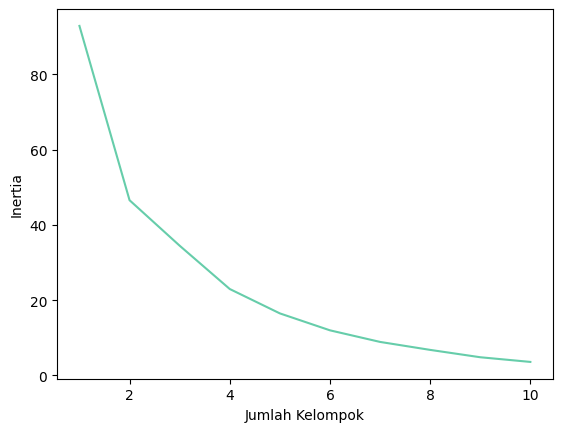

In [16]:
inertia_all = []

for i in range(1, 11):
    kmeans_all = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans_all.fit(X_tensor)
    inertia_all.append(kmeans_all.inertia_)

plt.plot(range(1, 11), inertia_all, color='mediumaquamarine')
plt.xlabel('Jumlah Kelompok')
plt.ylabel('Inertia')
plt.show()

In [17]:
input_dim = X.shape[1]
n_clusters = 4

In [18]:
input_layer = Input(shape=(input_dim,))

In [19]:
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

In [20]:
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

In [21]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [22]:
autoencoder.compile(optimizer='adam', loss='mse')

In [23]:
autoencoder.fit(X_tensor, X_tensor, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50
2/2 [==============================] - 1s 14ms/step - loss: 0.3955
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 0.3788
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3622
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3436
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3238
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3002
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2774
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.2514
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2243
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1978
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1730
Epoch 12/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1525
Epoch 13/50
2/2 [==============================] - 0s 8ms/step - loss: 

In [24]:
hidden_representation = Model(inputs=input_layer, outputs=encoded)
X_encoded = hidden_representation.predict(X_tensor)

2/2 [==============================] - 0s 6ms/step


In [25]:
kmeans = KMeans(n_clusters=n_clusters,  n_init=10, random_state=42)
kmeans.fit(X_encoded)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [26]:
labels = kmeans.labels_

In [27]:
df['Kelompok'] = labels

In [28]:
df

,no,jenis_kelamin,usia,berat(kg),tinggi(cm),jenis_aktivitas,kolesterol,asam_lambung,diabetes_tipe_1,diabetes_tipe_2,darah_tinggi,darah_rendah,usus_buntu,Kelompok
0,1,Laki-laki,30,70,170,Sedang,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,1
1,2,Perempuan,45,65,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,3
2,3,Laki-laki,55,80,175,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,0
3,4,Perempuan,40,55,165,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,1
4,5,Laki-laki,50,90,180,Berat,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,2
5,6,Perempuan,35,60,155,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,3
6,7,Laki-laki,42,75,172,Sedang,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,1
7,8,Perempuan,28,52,160,Ringan,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,3
8,9,Laki-laki,60,85,178,Berat,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,0
9,10,Perempuan,47,63,158,Sedang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,1
